In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima.arima import auto_arima
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA

### Load the data from the CVS file, setting the index to the first column containing the date of the observation

In [2]:
df=pd.read_csv('ts5.csv')
df.columns = ['Day', 'x']
df.set_index('Day', inplace=True)
print(df.head())

              x
Day            
1    371.333344
2    402.863342
3    390.666656
4    404.619995
5    409.970001


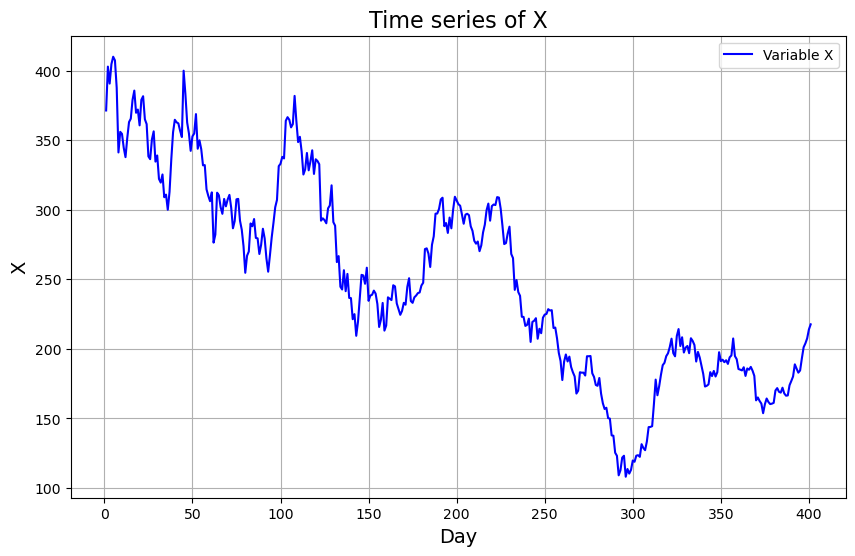

In [3]:
# Plot the timse series 
plt.figure(figsize=(10, 6)) 
plt.plot(df.index, df['x'], label='Variable X', color='blue')  
plt.title('Time series of X', fontsize=16) 
plt.xlabel('Day', fontsize=14) 
plt.ylabel('X', fontsize=14)  
plt.legend()  
plt.grid(True)  
plt.show()

### Split the data into train and test partitions (80,20)

In [4]:
# Calculate the 80% of the data
train_size = int(len(df) * 0.8)

# Split the data
train = df.iloc[:train_size]  # 80% inicial
test = df.iloc[train_size:]   # 20% final

# Check sizes
print(f"Train: {len(train)} rows, Test: {len(test)} rows")


Train: 320 rows, Test: 81 rows


## Determining the model order

### Before creating the model, plot the series to identify what patterns are present. Using the train data only

<Axes: xlabel='Day'>

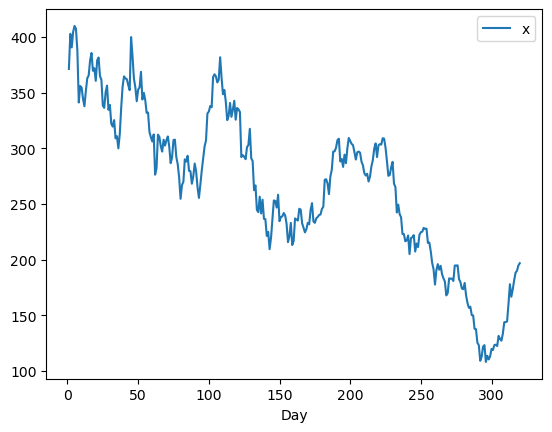

In [5]:
train.plot()

### The variance appears to be steady over time, so there is no need to perform a Box-Cox transformation. However, the mean of the series clearly changes sigificantly over time
### We can check for stationarity using the Augmented Dickey-Fuller test.The hypotheses for this are:
##### Ho: the time is non-stationary. There is a change in either or both of the mean and variance over time
##### Hi: the time series is stationary. There is no change in the mean.

In [6]:
adfuller(train['x'])

(-1.6286681325611188,
 0.4681879425986012,
 9,
 310,
 {'1%': -3.451621854687657,
  '5%': -2.870908950689806,
  '10%': -2.571761810613944},
 2306.0264548811965)

### The plot and the result for the Augmented Dickey-Fuller test shows the series is non-stationary. So we will apply differencing to transform the non-stationary series into a stationary one.

In [7]:
FirstDifference = (train['x'] - train['x'].shift(1)).dropna()

### Having taken the first difference, we will plot it to see the impact on stationarity.

<Axes: xlabel='Day'>

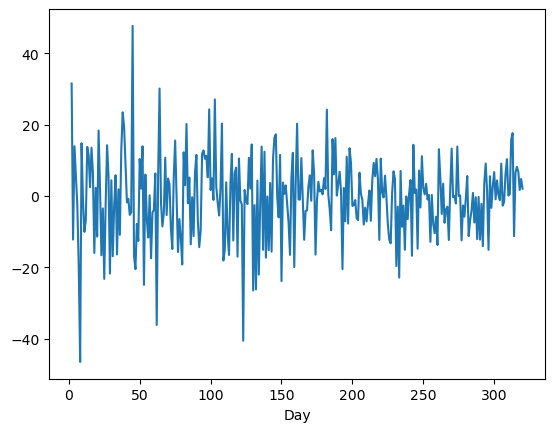

In [8]:
FirstDifference.plot()

In [9]:
round(adfuller(FirstDifference)[1],3)

0.0

### The series looks stationary and the Augmented Dickey-Fuller test confirm this, as the p-value is less than alpha 0.05
### Reject the null hypothesis and conclude that the differenced series is stationary.

### Now, we can plot autocorrelation function and partial autocorrelation functions to try to determine the orders of p and q, the autoregressive and moving average terms.

Figure(640x480)


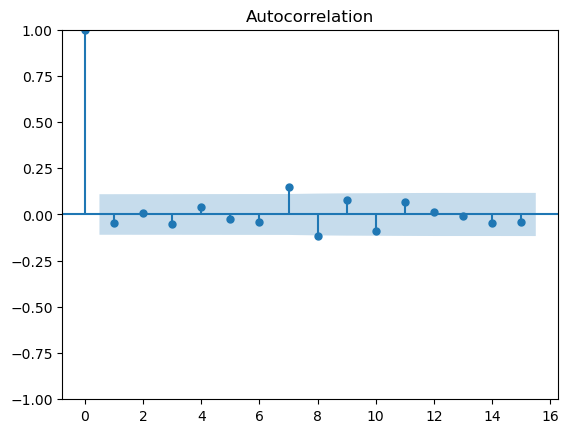

In [26]:
print(plot_acf(FirstDifference,lags=15))

Figure(640x480)


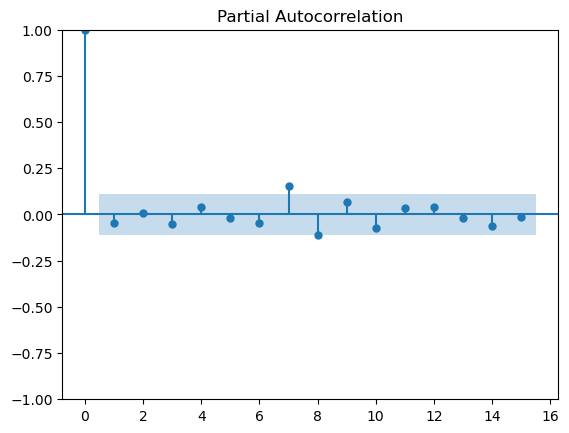

In [11]:
print(plot_pacf(FirstDifference,lags=15))

### The PACF plot indicates that the most suitable model is AR(7)

## Fitting the models

### I will first fit an ARIMA(7,1,0) model. Will also fit close variations of this model, such as ARIMA (6,1,0), ARIMA(8,1,0), ARIMA(7,1,1)

## ARIMA(7,1,0)

In [12]:
model710=ARIMA(train["x"], order=(7,1,0))
fit710=model710.fit()
print(fit710.summary())

C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  320
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -1224.890
Date:                Mon, 25 Nov 2024   AIC                           2465.779
Time:                        13:31:58   BIC                           2495.901
Sample:                             0   HQIC                          2477.808
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0405      0.064     -0.629      0.529      -0.167       0.086
ar.L2          0.0118      0.048      0.243      0.808      -0.083       0.107
ar.L3         -0.0593      0.068     -0.876      0.3

## ARIMA(6,1,0)

In [13]:
model610=ARIMA(train["x"], order=(6,1,0))
fit610=model610.fit()
print(fit610.summary())

C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  320
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -1229.133
Date:                Mon, 25 Nov 2024   AIC                           2472.266
Time:                        13:31:59   BIC                           2498.623
Sample:                             0   HQIC                          2482.792
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0418      0.064     -0.650      0.515      -0.168       0.084
ar.L2          0.0089      0.050      0.177      0.859      -0.090       0.108
ar.L3         -0.0501      0.069     -0.727      0.4

## ARIMA(8,1,0)

In [14]:
model810=ARIMA(train["x"], order=(8,1,0))
fit810=model810.fit()
print(fit810.summary())

C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  320
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -1222.782
Date:                Mon, 25 Nov 2024   AIC                           2463.563
Time:                        13:31:59   BIC                           2497.450
Sample:                             0   HQIC                          2477.096
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0222      0.067     -0.333      0.739      -0.153       0.108
ar.L2          0.0116      0.049      0.238      0.812      -0.084       0.107
ar.L3         -0.0619      0.066     -0.935      0.3

## ARIMA (7,1,1)

In [15]:
model711=ARIMA(train["x"], order=(7,1,1))
fit711=model711.fit()
print(fit711.summary())

C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  320
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -1221.254
Date:                Mon, 25 Nov 2024   AIC                           2460.508
Time:                        13:31:59   BIC                           2494.395
Sample:                             0   HQIC                          2474.041
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6641      0.162     -4.101      0.000      -0.981      -0.347
ar.L2         -0.0143      0.067     -0.212      0.832      -0.146       0.118
ar.L3         -0.0541      0.076     -0.710      0.4

## Conclusion
### The ARIMA (7,1,1) has the lowest AIC. We will check with auto_arima function if there are the same results.

In [16]:
auto_arima(train["x"])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
model010=ARIMA(train["x"], order=(0,1,0))
fit010=model010.fit()
print(fit010.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  320
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1230.493
Date:                Mon, 25 Nov 2024   AIC                           2462.986
Time:                        13:32:01   BIC                           2466.751
Sample:                             0   HQIC                          2464.489
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       131.2170      7.668     17.113      0.000     116.189     146.245
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                37.51
Prob(Q):                              0.40   Pr

C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### The model that auto_arima suggest has not the lowest AIC, hence I will continue with ARIMA(7,1,1)

## Diagnostics

### Plot the residuals to see if they significantly differ from white noise

<Axes: xlabel='Day'>

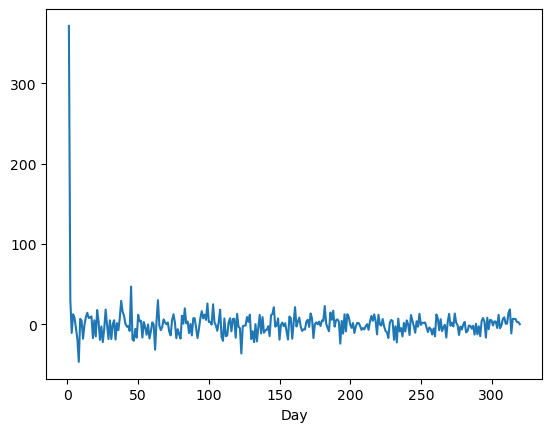

In [18]:
fit711.resid.plot()

### The residuals appear to be close to white noise
### We should also check if serial correlation exists in the residuals. We can do this using the Ljung-Box test. It has the following hypotheses:
##### Ho: The series is independently distributed
##### Hi: The series is not independently distrivuted - it exhibits serial correlation

In [19]:
ljung_box_result = acorr_ljungbox(fit711.resid, lags=10)
print(ljung_box_result)

     lb_stat  lb_pvalue
1   1.511062   0.218977
2   1.676945   0.432371
3   1.956527   0.581478
4   2.056899   0.725294
5   2.097762   0.835459
6   2.568397   0.860736
7   5.771714   0.566644
8   5.836009   0.665595
9   5.886213   0.751250
10  6.388167   0.781665


### At all lags up to 10, the p-value is not significant, indicating that no serial correlation is present.

## Evaluation

### We can now produce a forecast using the fitted model. We will forecast 81 periods into the future

In [20]:
predictions_711 = fit711.forecast(len(test))

C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\valen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Having produce the forecast, we can plot the original series, the fitted values and the forecast

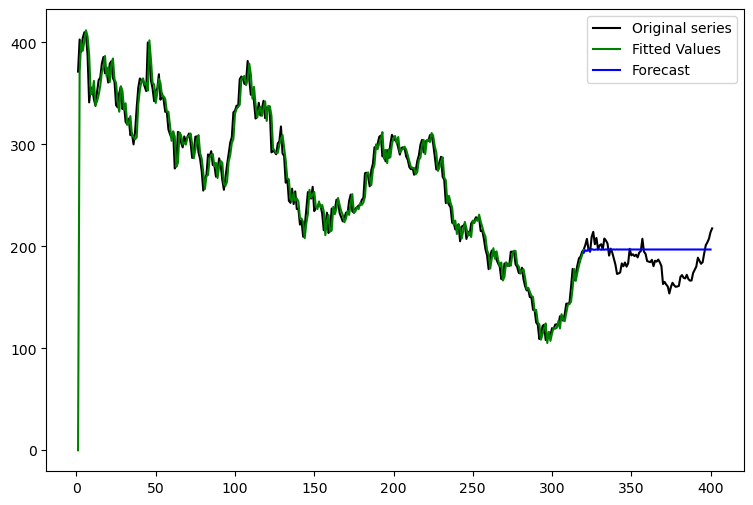

In [23]:
plt.figure(figsize=(9,6))
plt.plot(df['x'], color ="black", label = "Original series")
plt.plot(fit711.fittedvalues, color ="green", label = "Fitted Values")
plt.plot(predictions_711, color ="blue", label = "Forecast")
plt.legend()

### From the plot, it is clear that the ARIMA model produced a flat forecast. In fact, ARIMA forecasts are mean reverting, as the greater the forecast horizon, the more they tend towards the mean.
### Now we can calculate the MAE, RMSE and MAPE for the fitted model. These are measures of in sample error.

In [24]:
mae711 = mean_absolute_error(train, fit711.fittedvalues)
rmse711 = mean_squared_error(train, fit711.fittedvalues)**0.5
mape711 = mean_absolute_percentage_error(train, fit711.fittedvalues)

print("ARIMA(7,1,1) - MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(mae711,rmse711,mape711))


ARIMA(7,1,1) - MAE:9.538, RMSE:23.555, MAPE:0.036


### We can also find the MAE,RMSE and MAPE for the forecast. These are measures of out of sample error.

In [25]:
mae_fcast = mean_absolute_error(test, predictions_711)
rmse_fcast = mean_squared_error(test, predictions_711)**0.5
mape_fcast = mean_absolute_percentage_error(test, predictions_711)

print("ARIMA(7,1,1) - MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(mae_fcast,rmse_fcast,mape_fcast))

ARIMA(7,1,1) - MAE:15.328, RMSE:18.934, MAPE:0.087


### Although the RMSE is lower, indicating the presence of fewer large-magnitude errors, both the MAE and MAPE are higher.